In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
file_data = r'C:\Users\LENOVO\Documents\Data_Science\Naresh_it\Data Science\Batch october\datasets\omkar_sir_datasets\Visadataset.csv'
visa_df = pd.read_csv(file_data)
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [3]:
visa_df['continent'].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [4]:
visa_df['case_status'].value_counts()

case_status
Certified    17018
Denied        8462
Name: count, dtype: int64

In [ ]:
# ques-> Out of all,Asian Applicants how many got Visa?
# ques-> Out of all,Europe Applicants how many got Visa?

In [32]:
len(visa_df[(visa_df['continent']=='Asia')&(visa_df['case_status']=='Certified')])

11012

In [33]:
len(visa_df[(visa_df['continent']=='Europe')&(visa_df['case_status']=='Certified')])

2957

In [73]:
data = visa_df['continent'].unique()
data

array(['Asia', 'Africa', 'North America', 'Europe', 'South America',
       'Oceania'], dtype=object)

In [74]:
certified_count = []
denied_count = []
for val in data:
    certified_count.append(len(visa_df[(visa_df['continent']==val)&(visa_df['case_status']=='Certified')]))
    denied_count.append(len(visa_df[(visa_df['continent']==val)&(visa_df['case_status']=='Denied')]))
pd.DataFrame(zip(data,certified_count),columns=['Continent','Case_Status'])

,Continent,Case_Status
0,Asia,11012
1,Africa,397
2,North America,2037
3,Europe,2957
4,South America,493
5,Oceania,122


In [7]:
pd.DataFrame(zip(data,certified_count),columns=['Continent','Case_Status']).set_index('Continent')

,Case_Status
Continent,
Asia,11012
Africa,397
North America,2037
Europe,2957
South America,493
Oceania,122


In [75]:
pd.DataFrame(zip(data,denied_count),columns=['Continent','Case_Status'])

,Continent,Case_Status
0,Asia,5849
1,Africa,154
2,North America,1255
3,Europe,775
4,South America,359
5,Oceania,70


In [76]:
pd.DataFrame(zip(data,denied_count),columns=['Continent','Case_Status']).set_index('Continent')

,Case_Status
Continent,
Asia,5849
Africa,154
North America,1255
Europe,775
South America,359
Oceania,70


In [77]:
pd.DataFrame(zip(data,certified_count,denied_count,),columns=['Continent','Certified','Denied'])

,Continent,Certified,Denied
0,Asia,11012,5849
1,Africa,397,154
2,North America,2037,1255
3,Europe,2957,775
4,South America,493,359
5,Oceania,122,70


In [78]:
pd.DataFrame(zip(data,certified_count,denied_count),columns=['Continent','Certified','Denied']).set_index('Continent')

,Certified,Denied
Continent,,
Asia,11012,5849
Africa,397,154
North America,2037,1255
Europe,2957,775
South America,493,359
Oceania,122,70


In [58]:
#we can all do it by one single pd.crosstab

$pd.crosstab$

In [79]:
col1 = visa_df['continent']
col2 = visa_df['case_status']
result = pd.crosstab(col1,col2)
result

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


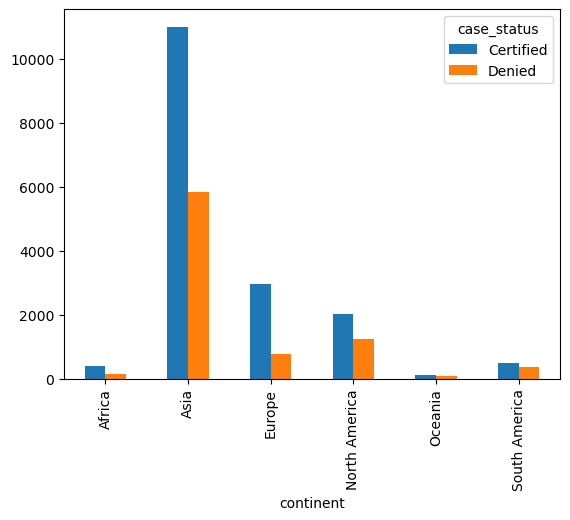

In [80]:
result.plot(kind='bar')
plt.show()

# now with continent,case_status,education of employee

In [83]:
coln1 = visa_df['case_status']
coln2 = visa_df['education_of_employee']
coln3 = visa_df['continent']
result3= pd.crosstab(coln3,[coln1,coln2])
result3

case_status            Certified                                    Denied  \
education_of_employee Bachelor's Doctorate High School Master's Bachelor's   
continent                                                                    
Africa                        81        43          23      250         62   
Asia                        4407       780         676     5149       2761   
Europe                      1040       788         162      967        259   
North America                641       207         210      979        584   
Oceania                       38        19          19       46         28   
South America                160        75          74      184        173   

case_status                                           
education_of_employee Doctorate High School Master's  
continent                                             
Africa                       11          43       38  
Asia                        143        1614     1331  
Europe                       58         328      130  
North America                51         191      429  
Oceania                       3          17       22  
South America                14          63      109

<Axes: xlabel='continent'>

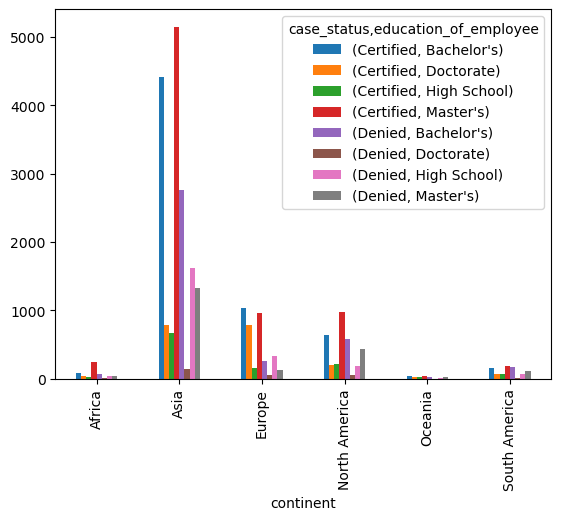

In [82]:
result3.plot(kind='bar')

In [18]:
len(visa_df[(visa_df['continent']=='Asia')&(visa_df['case_status']=='Certified')&(visa_df['education_of_employee']=='High School')])

676

In [19]:
len(visa_df[(visa_df['continent']=='Europe')&(visa_df['case_status']=='Denied')&(visa_df['education_of_employee']=='Doctorate')])

58

In [15]:
data_col = visa_df['education_of_employee'].unique()
data_col,data

(array(['High School', "Master's", "Bachelor's", 'Doctorate'], dtype=object),
 array(['Asia', 'Africa', 'North America', 'Europe', 'South America',
        'Oceania'], dtype=object))

In [48]:
certified_count = []
denied_count = []
continent_col=[]
education_col=[]
for i in data:  
    for j in data_col:
        continent_col.append(i)
        education_col.append(j)
        certified_count.append(len(visa_df[(visa_df['continent'] == i) & (visa_df['case_status'] == 'Certified') & (visa_df['education_of_employee'] == j)]))
        denied_count.append(len(visa_df[(visa_df['continent'] == i) & (visa_df['case_status'] == 'Denied') & (visa_df['education_of_employee'] == j)]))
df = pd.DataFrame({
    'Continent': continent_col,
    'Education': education_col,
    'Certified': certified_count,
    'Denied': denied_count
})
result2 = df.set_index('Continent')
result2
pd.DataFrame(zip(continent_col,education_col,certified_count,denied_count),columns=['Continent','Education','Certified','Denied']).set_index('Continent')

,Education,Certified,Denied
Continent,,,
Africa,Bachelor's,81,62
Africa,Doctorate,43,11
Africa,High School,23,43
Africa,Master's,250,38
Asia,Bachelor's,4407,2761
Asia,Doctorate,780,143
Asia,High School,676,1614
Asia,Master's,5149,1331
Europe,Bachelor's,1040,259


$Numerical-vs-Numerical$

_plt.scatter_

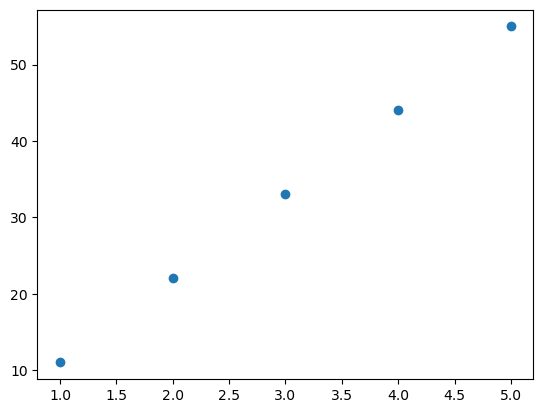

In [49]:
x=[1,2,3,4,5]
y=[11,22,33,44,55]
plt.scatter(x,y)

In [52]:
x=[i for i in range(-10,11)]
y=[pow(k,2) for k in x]
x

[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [53]:
y

[100, 81, 64, 49, 36, 25, 16, 9, 4, 1, 0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100]

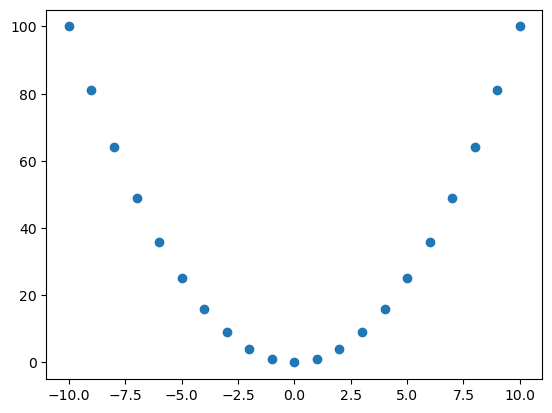

In [54]:
plt.scatter(x,y)

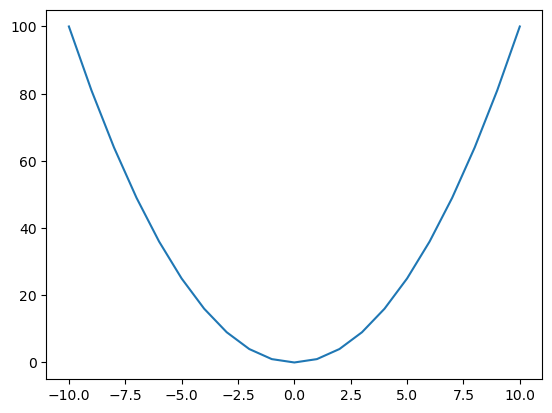

In [55]:
plt.plot(x,y)

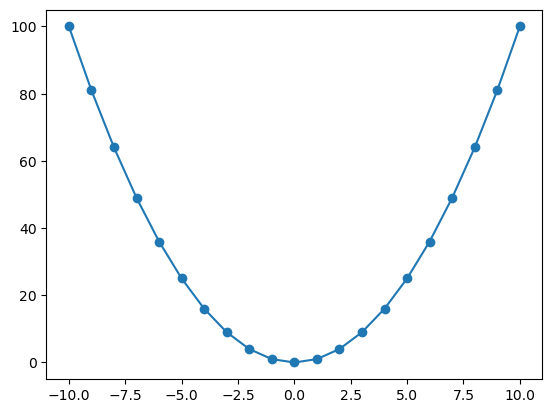

In [56]:
plt.scatter(x,y)
plt.plot(x,y)
plt.show()

* scatter plots are only used for numerical analysis
* scatter plots provides an idea,both variables are related or not related
* Positive relation
    * increase in the curve
* Negative relation
    * decrease in the curve
* No Relation
    * Neither increase nor decrease

In [60]:
dtypes = visa_df.dtypes.to_dict()
num_col = [a for a in dtypes if dtypes[a] != 'O' ]
num_col

['no_of_employees', 'yr_of_estab', 'prevailing_wage']

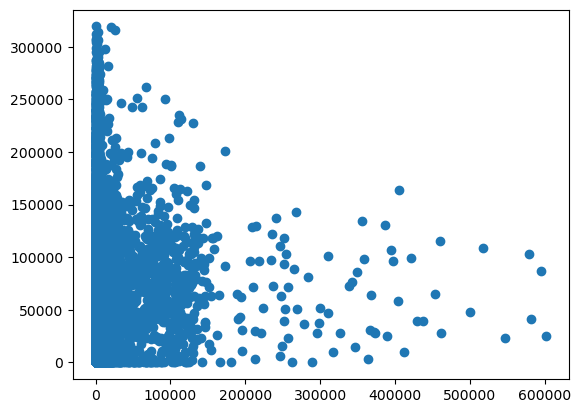

In [ ]:
colmn1 = visa_df['no_of_employees']
colmn2 = visa_df['prevailing_wage']
plt.scatter(colmn1,colmn2)#it is saying there is no relation
plt.show()

In [ ]:
$Covariance-matrix$

#How many numerical columns are there :3

#        'no_of_employees', 'yr_of_estab', 'prevailing_wage'

#no_of_employees     var     cov     cov

#yr_of_estab         cov     var     cov

#prevailing_wage     cov     cov     var

$correlation-coefficient$

- Denoted with r
- r range from -1 to 1                  # mean [2,5]-> both are included
- positive relation range = (0,1]       # mean [2,5)-> 2 included but 5 is not included
- negative relation range = [-1,0)      # mean (2,5]-> 2 not included but 5 is included
- no relation = 0                       # mean (2,5)-> both are not included

<img src="https://v.fastcdn.co/u/11443291/57605682-0-correlation-formula-.JPG" jsaction="" class="sFlh5c FyHeAf iPVvYb" style="max-width: 561px; height: 313px; margin: 1.5px 0px; width: 431px;" alt="What Is The Correlation Formula?" jsname="kn3ccd">

$corr()$

In [68]:
visa_df.corr(numeric_only=True)

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


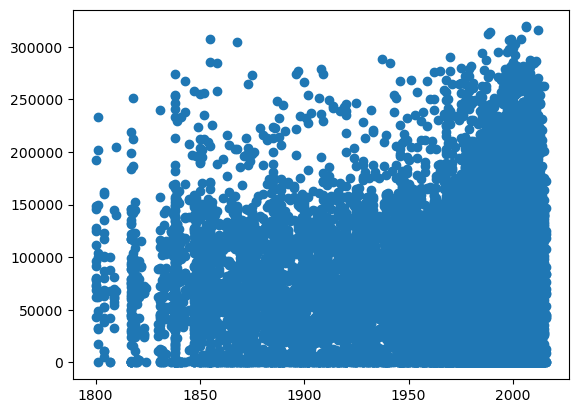

In [70]:
plt.scatter(visa_df['yr_of_estab'],visa_df['prevailing_wage'])

In [ ]:
matrix
showing values in a matrix
showing values in a pictorial->Heatmap

In [84]:
corr_data = visa_df.corr(numeric_only=True)
corr_data

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


<Axes: >

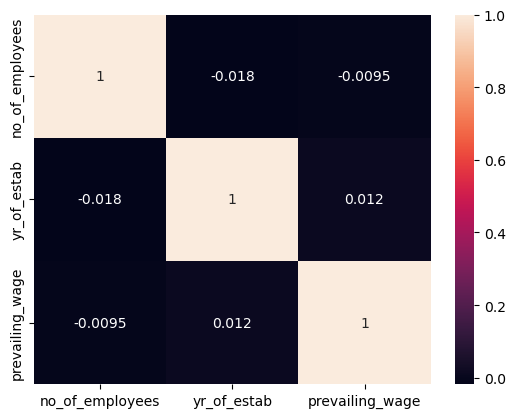

In [86]:
sns.heatmap(corr_data,annot=True)

In [87]:
file_path = r'C:\Users\LENOVO\Documents\Data_Science\Naresh_it\Data Science\Batch october\datasets\omkar_sir_datasets\winequality_red.csv'
wine_df = pd.read_csv(file_path)
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [88]:
wine_df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


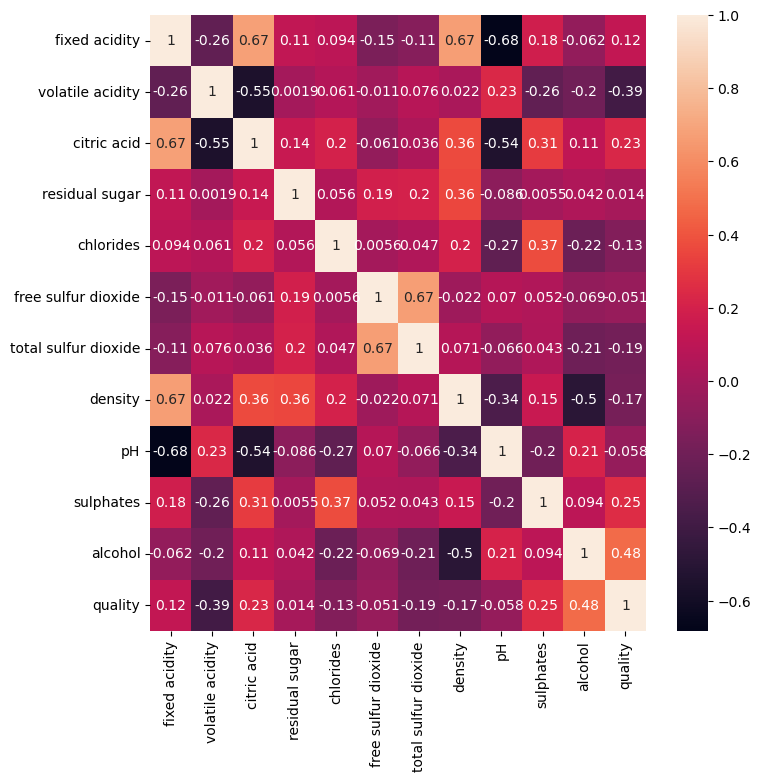

In [91]:
plt.figure(figsize=(8,8))
sns.heatmap(wine_df.corr(),annot=True)
plt.show()

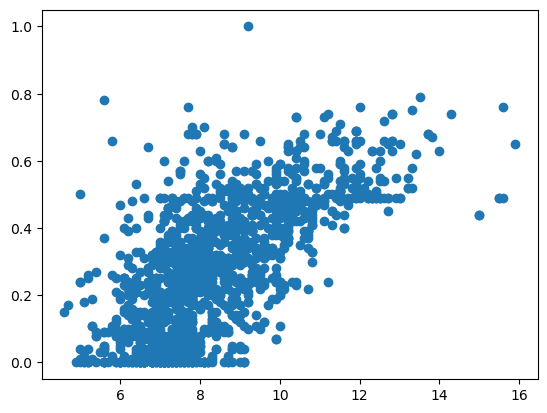

In [92]:
plt.scatter(wine_df['fixed acidity'],wine_df['citric acid'])

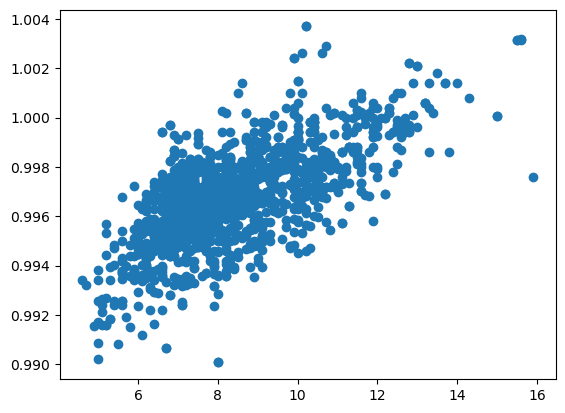

In [123]:
plt.scatter(wine_df['fixed acidity'],wine_df['density'])

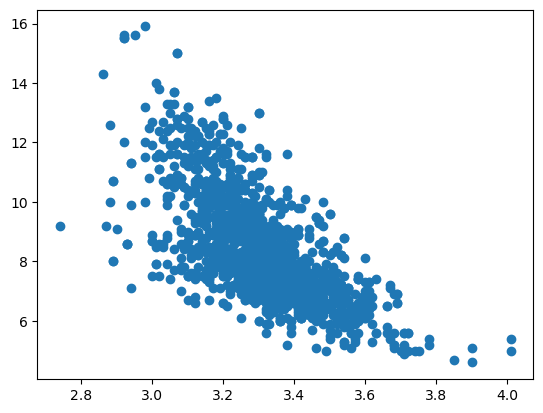

In [95]:
plt.scatter(wine_df['pH'],wine_df['fixed acidity'])

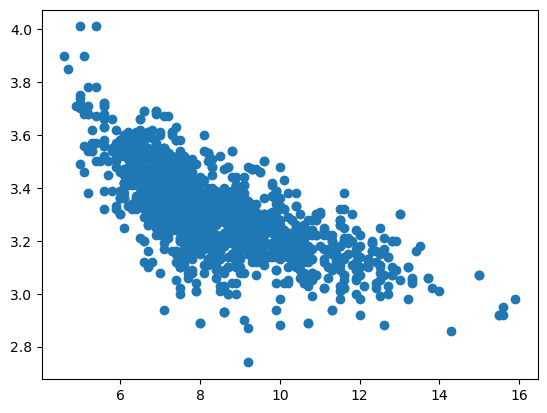

In [96]:
plt.scatter(wine_df['fixed acidity'],wine_df['pH'])

_Tarakeshwari ma'am data analytics_

In [97]:
a = pd.Series([50,40,35,27,29,35,12,10,84,32,65])
a

0     50
1     40
2     35
3     27
4     29
5     35
6     12
7     10
8     84
9     32
10    65
dtype: int64

<Axes: title={'center': 'line plot'}>

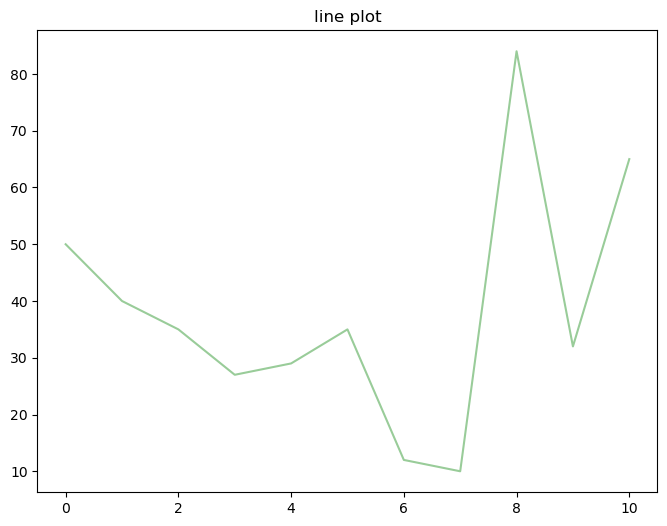

In [112]:
a.plot(figsize=(8,6),title='line plot',color='green',alpha=0.4)

In [102]:
b = pd.Series([60,30,45,17,39,45,22,20,94,52,85])
b

0     60
1     30
2     45
3     17
4     39
5     45
6     22
7     20
8     94
9     52
10    85
dtype: int64

<Axes: >

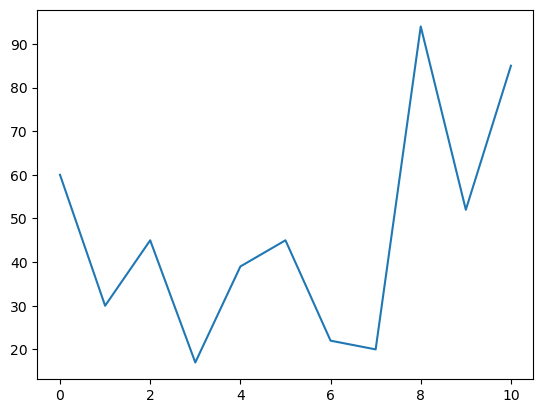

In [113]:
b.plot()

In [114]:
bc = pd.Series([40,97,65,76,46,39,45,22,50,64,42,55])
bc

0     40
1     97
2     65
3     76
4     46
5     39
6     45
7     22
8     50
9     64
10    42
11    55
dtype: int64

In [115]:
c = pd.DataFrame({'a':a,'b':b,'bc':bc})
c

,a,b,bc
0,50.0,60.0,40
1,40.0,30.0,97
2,35.0,45.0,65
3,27.0,17.0,76
4,29.0,39.0,46
5,35.0,45.0,39
6,12.0,22.0,45
7,10.0,20.0,22
8,84.0,94.0,50
9,32.0,52.0,64


<Axes: title={'center': 'area plot'}>

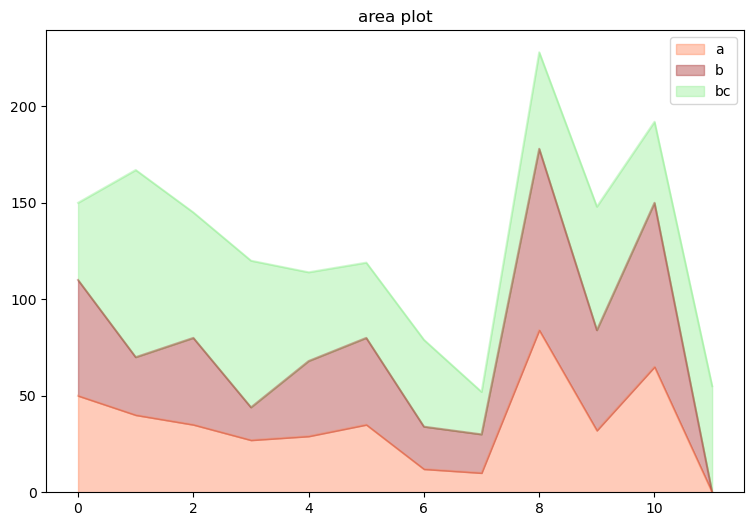

In [122]:
c.plot.area(figsize=(9,6),color=['coral','brown','lightgreen'],title='area plot',alpha=0.4)